In [52]:
import pandas as pd

monthly_data = pd.read_csv('/Users/dterenyi/Downloads/COLLEGE/BUAN 6341.001 Applied Machine Learning/Group Project/housing_in_london_monthly_variables.csv')
yearly_data = pd.read_csv('/Users/dterenyi/Downloads/COLLEGE/BUAN 6341.001 Applied Machine Learning/Group Project/housing_in_london_yearly_variables.csv')

print(monthly_data.info())
print(monthly_data.head())
print(yearly_data.info())
print(yearly_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB
None
         date            area  average_price       code  houses_sold  \
0  1995-01-01  city of london          91449  E09000001         17.0   
1  1995-02-01  city of london          82203  E09000001          7.0   
2  1995-03-01  city of london          79121  E09000001         14.0   
3  1995-04-01  city of london          77101  E09000001          7.0   
4  1995-05-01  city of london          84409  E09000001         10.

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/dterenyi/Downloads/COLLEGE/BUAN 6341.001 Applied Machine Learning/Group Project/cleaned_housing_data.csv')

print(data.describe())
print(data.head())

       median_salary  life_satisfaction  population_size  number_of_jobs  \
count    1049.000000         352.000000     1.018000e+03    9.310000e+02   
mean    27977.792183           7.485057     6.042576e+06    3.188095e+06   
std      6412.807487           0.198451     1.526810e+07    8.058302e+06   
min     15684.000000           7.000000     6.581000e+03    4.700000e+04   
25%     23857.000000           7.350000     2.243458e+05    9.450000e+04   
50%     27441.000000           7.510000     2.946035e+05    1.570000e+05   
75%     30932.000000           7.640000     4.630098e+06    2.217000e+06   
max     61636.000000           7.960000     6.643555e+07    3.575000e+07   

          area_size  no_of_houses  borough_flag  
count  6.660000e+02  6.660000e+02   1071.000000  
mean   3.724903e+05  8.814682e+05      0.647059  
std    2.157060e+06  3.690376e+06      0.478108  
min    3.150000e+02  5.009000e+03      0.000000  
25%    2.960000e+03  8.763550e+04      0.000000  
50%    4.323000

In [53]:
# Diuplicate handling
monthly_data.drop_duplicates(inplace=True)
yearly_data.drop_duplicates(inplace=True)

# Null count
print(monthly_data.isnull().sum())
print(yearly_data.isnull().sum())

# Dropping columns, 50% threshold
for column in monthly_data.columns:
    if monthly_data[column].isnull().mean() > 0.5:
        monthly_data.drop(column, axis=1, inplace=True)

for column in yearly_data.columns:
    if yearly_data[column].isnull().mean() > 0.5:
        yearly_data.drop(column, axis=1, inplace=True)

# Impute missing values with the median for houses_sold
monthly_data['houses_sold'].fillna(monthly_data['houses_sold'].median(), inplace=True)

monthly_data['average_price'].fillna(monthly_data['average_price'].mean(), inplace=True)

# Date conversion to datetime format
monthly_data['date'] = pd.to_datetime(monthly_data['date'])
yearly_data['date'] = pd.to_datetime(yearly_data['date'])

# Xategorical area conversion into dummy variables for the monthly data
monthly_data = pd.get_dummies(monthly_data, columns=['area'], drop_first=True)


print(monthly_data.info())
print(monthly_data.head())


date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64
code                   0
area                   0
date                   0
median_salary         22
life_satisfaction    719
mean_salary            0
recycling_pct        211
population_size       53
number_of_jobs       140
area_size            405
no_of_houses         405
borough_flag           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13549 entries, 0 to 13548
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         13549 non-null  datetime64[ns]
 1   average_price                13549 non-null  int64         
 2   code                         13549 non-null  object        
 3   houses_sold                  13549 non-null  float64       
 4   no_of_crimes    

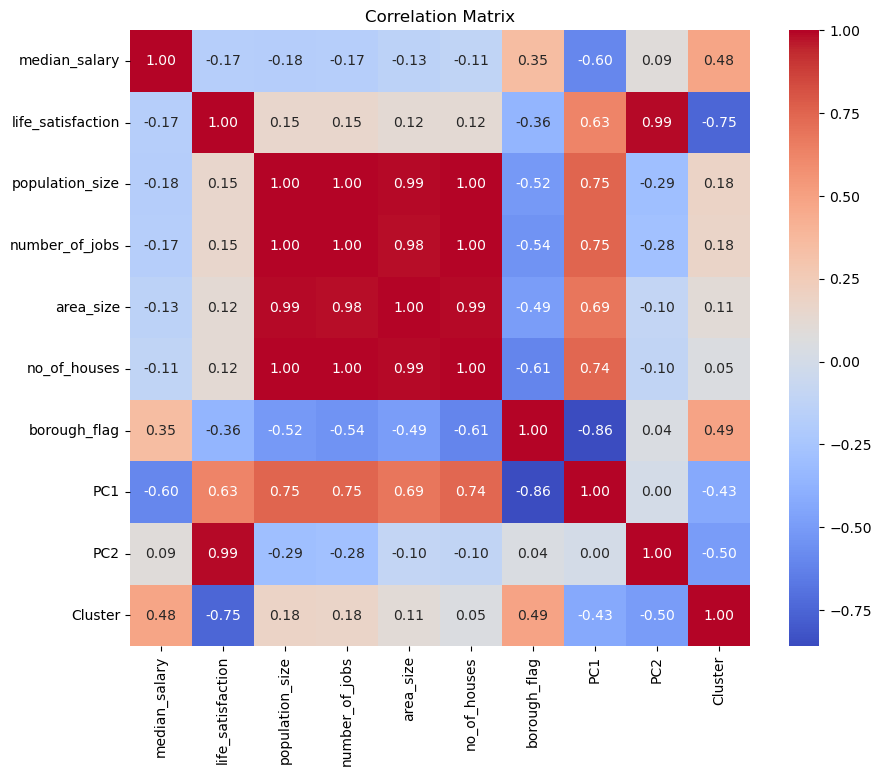

In [54]:
corr_matrix = data.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/var/folders/93/3ts0zzls35x_gw9x24flz0xr0000gn/T/ipykernel_14318/4062928127.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)  # Handling missing values


K-Means Silhouette Score: 0.47124227932631546
Hierarchical Clustering Silhouette Score: 0.4322638981180545
DBSCAN Silhouette Score: 0.45627960297428527


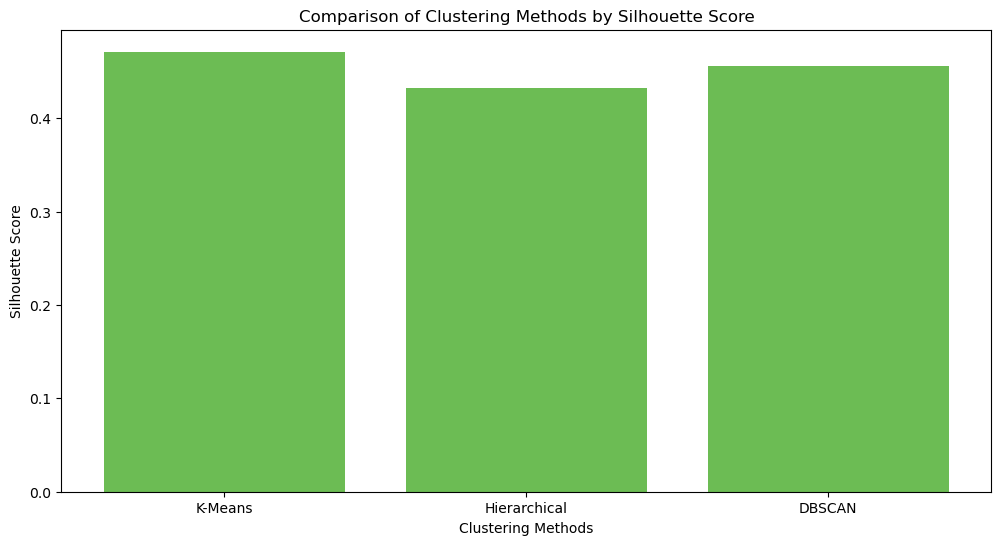

In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

#data = pd.read_csv('/Users/dterenyi/Downloads/COLLEGE/BUAN 6341.001 Applied Machine Learning/Group Project/housing_in_london_yearly_variables.csv')
features = data[['median_salary', 'life_satisfaction', 'population_size', 'borough_flag']]
features.fillna(features.mean(), inplace=True)  # Handling missing values
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)
kmeans_silhouette = silhouette_score(features_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Hierarchical Clustering
hclust = AgglomerativeClustering(n_clusters=3)
hclust_labels = hclust.fit_predict(features_scaled)
hclust_silhouette = silhouette_score(features_scaled, hclust_labels)
print(f"Hierarchical Clustering Silhouette Score: {hclust_silhouette}")

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)

# Silhouette score calc
core_samples_mask = dbscan_labels != -1
dbscan_silhouette = silhouette_score(features_scaled[core_samples_mask], dbscan_labels[core_samples_mask]) if core_samples_mask.any() else 0
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

plt.figure(figsize=(12, 6))
methods = ['K-Means', 'Hierarchical', 'DBSCAN']
scores = [kmeans_silhouette, hclust_silhouette, dbscan_silhouette]
plt.bar(methods, scores, color='#6cbc54')
plt.xlabel('Clustering Methods')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Clustering Methods by Silhouette Score')
plt.show()


In [56]:
features = data[['median_salary', 'life_satisfaction', 'population_size', 'borough_flag']].copy()
features.fillna(features.mean(), inplace=True)  # Impute missing values with mean safely

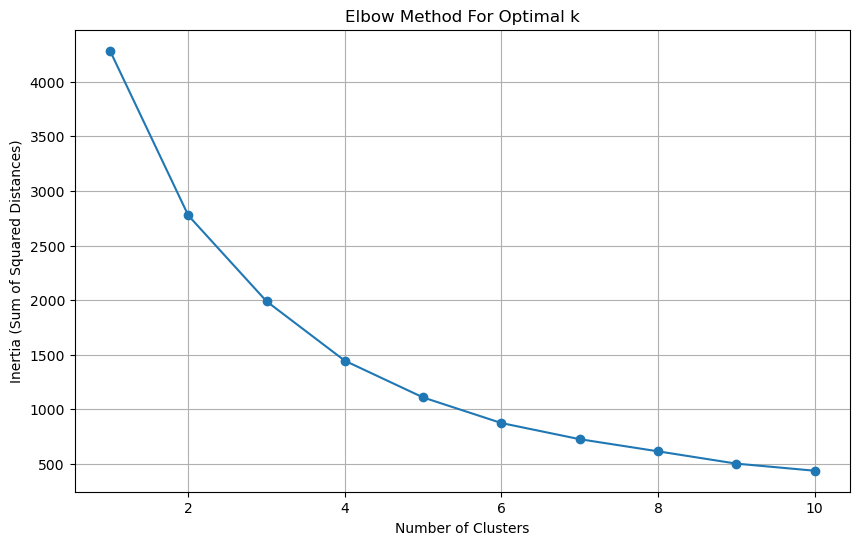

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features_scaled)
data['Cluster'] = kmeans.labels_

In [59]:
cluster_centers = kmeans.cluster_centers_

feature_names = ['median_salary', 'life_satisfaction', 'population_size', 'borough_flag']

centroids_df = pd.DataFrame(cluster_centers, columns=feature_names)
print(centroids_df)

   median_salary  life_satisfaction  population_size  borough_flag
0      -0.471351           0.329336        -0.066744     -1.354006
1      -0.024896           0.229832        -0.371090      0.738549
2      -0.540914           0.085771         3.458487     -1.354006
3       1.260283          -1.472616        -0.360808      0.684548


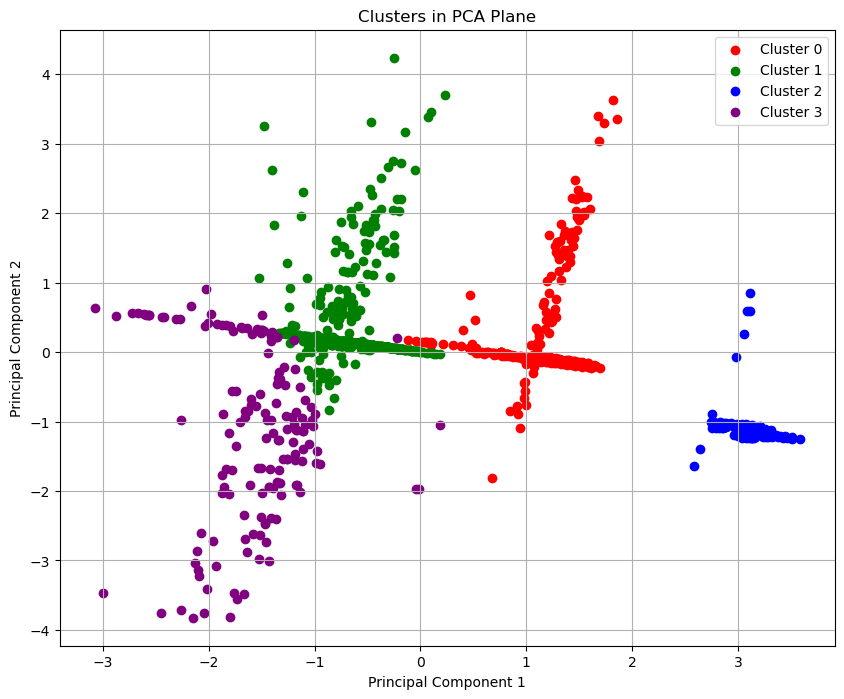

In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)


data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

# Plotting
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'purple']  # One color for each cluster

for i in range(4):
    plt.scatter(data.loc[data['Cluster'] == i, 'PC1'], data.loc[data['Cluster'] == i, 'PC2'], c=colors[i], label=f'Cluster {i}')

plt.title('Clusters in PCA Plane')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=features.columns)
print("PCA Loadings:")
print(loadings_df)

PCA Loadings:
                        PC1       PC2
median_salary     -0.452098  0.093108
life_satisfaction  0.248476  0.949435
population_size    0.558236 -0.296685
borough_flag      -0.649800  0.043394
